<a href="https://colab.research.google.com/github/juzambranol/AlgorithmsUN2022II/blob/main/Lab2/juzambranol_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [480]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [481]:
reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [482]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [483]:
assert ran_the_first_cell, "Oh noes!"

In [484]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [485]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [486]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [487]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [488]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [489]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [490]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [491]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [492]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [493]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [494]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [495]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [496]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [497]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [498]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [499]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [500]:
%%time

matmul(a, b)

CPU times: user 45 µs, sys: 0 ns, total: 45 µs
Wall time: 50.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [501]:
# CREATING DATAFRAME FOR EXAMPLES
import pandas as pd
import numpy as np

languages = ["NumPy","Fortran","Fortranmagic","Java","c","C++","Javascript","Python"]
timeExec = pd.DataFrame({"Language": languages, "Avrg.Secs": [0.0]*len(languages), "Speed Factor": [0.0]*len(languages)})
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.0,0.0
1,Fortran,0.0,0.0
2,Fortranmagic,0.0,0.0
3,Java,0.0,0.0
4,c,0.0,0.0
5,C++,0.0,0.0
6,Javascript,0.0,0.0
7,Python,0.0,0.0


In [502]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [503]:
def matmul(A, B):
    """Multiply matrix A by matrix B Changing."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [504]:
matmul(a,b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [505]:
def matmul(A, B):
    """Multiply matrix A by matrix B Changing."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if( len(A[0]) == len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      raise Exception("Number of columns of first matrix don't match with number of rows of second matrix") 
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [506]:
matmul(a,b)

Exception: ignored

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [507]:
a = [[41, 21, 53],
     [32, 6, 52],
     [15, 6, 10],
     [10, 100, 1]]

b = [[7, 69, 23, 15],
     [23, 31, 4, 1],
     [0, 8, 7, 7]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [508]:
matmul(a,b)

[[770, 3904, 1398, 1007],
 [362, 2810, 1124, 850],
 [243, 1301, 439, 301],
 [2370, 3798, 637, 257]]

In [509]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.2506633946686688, 0.4173542522005078, 0.08782404122692666],
 [0.6607353458955867, 0.38801667020065045, 0.9457540904338588]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [510]:
##Creating random matrix
randa=random_matrix(600,100)
randb=random_matrix(100,600)

In [511]:
import time
tpython=0
for i in range(10):
  time0=time.time()
  matmul(randa,randb)
  tpython+=time.time()-time0
tpython/=10
tpython

8.840545725822448

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [512]:
timeExec.iat[7, timeExec.columns.get_loc('Avrg.Secs')]=tpython

**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [513]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.24583108953502042, 0.23557590486224633, 0.9526238454345903],
 [0.4846933472670226, 0.8797054930684339, 0.6310005748692047]]

In [515]:
import time
mn=0
for i in range(0,10):
  
  randa = np.array(random_matrix(600, 100))
  randb = np.array(random_matrix(100, 600) ) 
  s=time.time()  
  x=randa@randb
  e=time.time()-s
  mn=mn+e
mn=mn/100

In [516]:
timeExec.iat[0, timeExec.columns.get_loc('Avrg.Secs')]= mn
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.000000,0.0
2,Fortranmagic,0.000000,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


In [517]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.21 s, sys: 28.7 ms, total: 9.24 s
Wall time: 9.26 s


In [518]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [519]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [520]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [521]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 15.5 ms


333328333350000.0

In [522]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 215 µs, sys: 0 ns, total: 215 µs
Wall time: 226 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [523]:
%%writefile tmpf.f
      program TEST
	      ! your code goes here
        INTEGER, DIMENSION(2, 2) :: a, b
        INTEGER :: i,j

        do i = 1, 2
          do j = 1, 2
              a(i, j) = i+j
          end do
        end do

        do i = 1, 2
          do j = 1, 2
              b(i, j) = i+j
          end do
        end do


	      stop
      end

Overwriting tmpf.f


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [524]:
%%writefile tmpf.f
      program TEST
	      ! your code goes here
        INTEGER, DIMENSION(2, 2) :: a, b, c
        INTEGER :: i,j

        do i = 1, 2
          do j = 1, 2
              a(i, j) = i+j
          end do
        end do

        do i = 1, 2
          do j = 1, 2
              b(i, j) = i*j
          end do
        end do

        c = matmul(a, b)
        Print*, 'Matrix Multiplication: Result Matrix'
   
        do i = 1, 2
            do j = 1, 2
              print*, c(i, j)
            end do
        end do

	      stop
      end

Overwriting tmpf.f


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [525]:
!gfortran tmpf.f -o tmpf
!./tmpf

 Matrix Multiplication: Result Matrix
           8
          16
          11
          22


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [526]:
%%fortran
      subroutine fortran_matmul()
        INTEGER, DIMENSION(600, 100) :: a
        INTEGER, DIMENSION(100, 600) :: b
        INTEGER, DIMENSION(100, 100) :: c
        INTEGER :: i,j

        do i = 1, 600
          do j = 1, 100
              a(i, j) = i+j
          end do
        end do

        do i = 1, 100
          do j = 1, 100
              b(i, j) = i*j
          end do
        end do

        c = matmul(b, a)
   

      end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [527]:
%%time
fortran_matmul()

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.42 ms


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [535]:
import time

times = []
for i in range(10):
  start = time.time()
  fortran_matmul()
  end = time.time()
  times.append(end-start)

np.array(times).mean()
timeExec.at[2, 'Avrg.Secs']= np.array(times).mean()
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.005060,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [536]:
%%writefile tmpf.f
      program TEST
        INTEGER, DIMENSION(600, 100) :: a
        INTEGER, DIMENSION(100, 600) :: b
        INTEGER, DIMENSION(100, 100) :: c
        INTEGER :: i,j

        do i = 1, 600
          do j = 1, 100
              a(i, j) = i+j
          end do
        end do

        do i = 1, 100
          do j = 1, 600
              b(i, j) = i*j
          end do
        end do

        c = matmul(b, a)

	      stop
      end

Overwriting tmpf.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [537]:
%%time
!gfortran tmpf.f -o tmpf
!./tmpf

CPU times: user 11 ms, sys: 23.1 ms, total: 34 ms
Wall time: 247 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [538]:
timeExec.at[1, 'Avrg.Secs']= 34/10000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.003400,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.000000,0.0
4,c,0.000000,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [539]:
%%writefile tmpc.c

#include <stdlib.h>
#include<time.h>
#include<stdio.h>

int main()
{
    srand(time(0));
    int A[600][100],B[100][600],matrizr[600][600];
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            A[i][j]=rand()%100;
        }
    }
    for(int i=0;i< 2;i++){
        for(int j=0;j<2;j++){
            B[i][j]=rand()%100;
        }
    }


    float ti,tf,retx;
    double time_spent=0.0;
    for(int rep=0;rep<10;rep++){
        ti=clock();
        for(int i=0;i<600;i++){
            for(int j=0;j<600;j++){
                matrizr[i][j]=0;
                for(int k=0;k<100;k++){
                    matrizr[i][j]+=A[i][k]*B[k][j];
              }
            }
        }
        tf=clock();
      time_spent += (double)(tf - ti) / CLOCKS_PER_SEC;
    }
    printf("%f",time_spent/10);
   return 0;
}


Overwriting tmpc.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [540]:
!gcc tmpc.c -o tmpc
!./tmpc

0.158615

**My own example 21 - Adding c average execution time to the data frame**

In [541]:
timeExec.iat[4, timeExec.columns.get_loc('Avrg.Secs')]= 0.158615
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.003400,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.000000,0.0
4,c,0.158615,0.0
5,C++,0.000000,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [542]:
%%writefile tmpc++.cpp

/*
 * This C++ program can multiply any two square or rectangular matrices.
 * The below program multiplies two square matrices of size 4 * 4.
 * There is also an example of a rectangular matrix for the same code (commented below).
 * We can change the Matrix value with the number of rows and columns (from MACROs) for Matrix-1
 * and Matrix-2 for different dimensions.
 */
 
/*
 * Note:  i- The number of columns in Matrix-1 must be equal to the number of rows in Matrix-2.
 *       ii- Output of multiplication of Matrix-1 and Matrix-2, results with equal to the number
 *           of rows of Matrix-1 and the number of columns of Matrix-2 i.e. rslt[R1][C2].
 */
 
#include <iostream>
#include <chrono>
using namespace std::chrono;
 
using namespace std;
 
// Edit MACROs here, according to your Matrix Dimensions for mat1[R1][C1] and mat2[R2][C2]
#define R1 600            // number of rows in Matrix-1
#define C1 100           // number of columns in Matrix-1
#define R2 100            // number of rows in Matrix-2
#define C2 600            // number of columns in Matrix-2
 
void mulMat(int mat1[][C1], int mat2[][C2]) {
    int rslt[R1][C2];
 

 
    for (int i = 0; i < R1; i++) {
        for (int j = 0; j < C2; j++) {
            rslt[i][j] = 0;
 
            for (int k = 0; k < R2; k++) {
                rslt[i][j] += mat1[i][k] * mat2[k][j];
            }
 
        }
 
    }
}
 
int main(void) {
    // Square Matrices
    // R1 = 4, C1 = 4 and R2 = 4, C2 = 4 (Update these values in MACROs)
    int mat1[R1][C1] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    int mat2[R2][C2] = {
            {1, 1, 1, 1},
            {2, 2, 2, 2},
            {3, 3, 3, 3},
            {4, 4, 4, 4}
    };
 
    /*
    // Rectangular Matrices
    // R1 = 3, C1 = 4 and R2 = 4, C2 = 3 (Update these values in MACROs)
    int mat1[R1][C1] = {
                {1, 1, 1, 1},
                {2, 2, 2, 2},
                {3, 3, 3, 3}
    };
 
    int mat2[R2][C2] = {
                {1, 1, 1},
                {2, 2, 2},
                {3, 3, 3},
                {4, 4, 4}
    };
    */
 
    if (C1 != R2) {
        cout << "The number of columns in Matrix-1  must be equal to the number of rows in "
                "Matrix-2" << endl;
        cout << "Please update MACROs according to your array dimension in #define section"
                << endl;
 
        exit(EXIT_FAILURE);
    }
 
    for (int i = 0; i < 10; i++){
      auto start = high_resolution_clock::now();
      mulMat(mat1, mat2);
      auto stop  = high_resolution_clock::now();
      auto duration = duration_cast<microseconds>(stop - start);
      cout << "Time: "
         << duration.count() << " microseconds" << endl;
    }

 
    return 0;
}
 
// This code is contributed by Manish Kumar (mkumar2789)

Overwriting tmpc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [543]:
!g++ tmpc++.cpp -o tmpc++
!./tmpc++

Time: 216142 microseconds
Time: 206222 microseconds
Time: 199098 microseconds
Time: 203100 microseconds
Time: 208248 microseconds
Time: 202409 microseconds
Time: 212225 microseconds
Time: 289661 microseconds
Time: 485245 microseconds
Time: 620390 microseconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [544]:
timeExec.at[5, "Avrg.Secs"] = (np.array([216142  ,206222 ,199098  ,203100  ,208248   ,202409  ,212225  ,289661  ,485245  ,620390  ]).mean())/1000000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.003400,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.000000,0.0
4,c,0.158615,0.0
5,C++,0.284274,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [545]:
%%writefile Main.java
import java.util.Arrays;
import java.util.Random;
class Main {

  public static void main(String[] args) {
    try{
      int[][] A=randomMatrix(600,100);
      int[][] B=randomMatrix(100,600);
      long timei = System.nanoTime();
      for(int i=0;i<10;i++){
        mulmat(A,B);
      }
      long timef = System.nanoTime();
      System.out.println("Average time in nanoSec: "+((timef - timei)/10));
    }catch(Exception e){
      System.out.println(e);
    }
    
  }
  public static int[][] randomMatrix(int x,int y){
    Random r=new Random();
    int[][] a=new int[x][y];
    for(int i=0;i<x;i++)
    {
        for(int j=0;j<y;j++)
        {
          a[i][j]=r.nextInt(20);
        }
    }
    return a;
  }
  public static void imp(int[][] matriz){
    for (int x=0; x < matriz.length; x++) {
  System.out.print("|");
  for (int y=0; y < matriz[x].length; y++) {
    System.out.print (matriz[x][y]);
    if (y!=matriz[x].length-1) System.out.print("\t");
  }
  System.out.println("|");
}
System.out.println("");
  }
  public static int[][] mulmat(int[][]A,int[][]B) throws Exception{
    int [] [] matrix = new int [A.length] [B[0].length];
    if(A[0].length==B.length){
      for(int i=0;i<A.length;i++){
        for(int j=0;j<B[0].length;j++){
          for(int k=0;k<B.length;k++){
            matrix[i][j]+=A[i][k]*B[k][j];
          }
        }
      }
    }else{
      throw new Exception("Number of columns of first matrix don't match with number of rows of second matrix");
    }
    return matrix;
  }
}

Overwriting Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [546]:
!javac Main.java


In [547]:
!java Main

Average time in nanoSec: 68564045


**My own example 27 - Adding Java average execution time to the data frame**

In [549]:
timeExec.iat[3, timeExec.columns.get_loc('Avrg.Secs')]=(68564045/10**9) ##Nanosegundos a segundos
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.003400,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.068564,0.0
4,c,0.158615,0.0
5,C++,0.284274,0.0
6,Javascript,0.000000,0.0
7,Python,8.840546,0.0


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [550]:
%%writefile tmp.js
const { performance } = require('perf_hooks');

function generateWeights(rows, cols) {
  return Array.from({ length: rows }).map(() =>
    Array.from({ length: cols }).map(() => Math.random() * 2)
  );
}

function multiply(a, b) {
  var aNumRows = a.length, aNumCols = a[0].length,
      bNumRows = b.length, bNumCols = b[0].length,
      m = new Array(aNumRows);  // initialize array of rows
  for (var r = 0; r < aNumRows; ++r) {
    m[r] = new Array(bNumCols); // initialize the current row
    for (var c = 0; c < bNumCols; ++c) {
      m[r][c] = 0;             // initialize the current cell
      for (var i = 0; i < aNumCols; ++i) {
        m[r][c] += a[r][i] * b[i][c];
      }
    }
  }
  return m;
}

for (var i = 0; i < 10; i++){
  var start = performance.now();
  var a = generateWeights(600, 100);
  var b = generateWeights(100, 600);
  multiply(a, b);
  var end = performance.now();
  var time = end- start;
  console.log(time + " ms");
}

Overwriting tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [551]:
!node tmp.js

286.652154000476 ms
323.7436190005392 ms
304.6154129989445 ms
311.07658100128174 ms
268.962833000347 ms
303.600399998948 ms
283.42650999873877 ms
263.31002900004387 ms
306.4303089994937 ms
281.14678200148046 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [552]:
timeExec.at[6, "Avrg.Secs"] = (np.array([286.652154000476,323.7436190005392,304.6154129989445,311.07658100128174,268.962833000347 ,303.600399998948 ,283.42650999873877 ,263.31002900004387 ,306.4303089994937 ,281.14678200148046 ,]).mean())/1000
timeExec

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,0.0
1,Fortran,0.003400,0.0
2,Fortranmagic,0.000868,0.0
3,Java,0.068564,0.0
4,c,0.158615,0.0
5,C++,0.284274,0.0
6,Javascript,0.293296,0.0
7,Python,8.840546,0.0


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [553]:
speed_factor=min(timeExec["Avrg.Secs"])
speed_factor

0.0006387591361999512

**My own example 32 - Adding the Speed factor columne to the data frame**

In [554]:
timeExec["Speed Factor"]=timeExec["Avrg.Secs"]/speed_factor

**My own example 33 - Sorting the the data frame by average execution time**

In [556]:
timeExec.at[4,"Language"]="C"
timeExec.sort_values(by=['Avrg.Secs'])

,Language,Avrg.Secs,Speed Factor
0,NumPy,0.000639,1.000000
2,Fortranmagic,0.000868,1.358379
1,Fortran,0.003400,5.322820
3,Java,0.068564,107.339435
4,C,0.158615,248.317388
5,C++,0.284274,445.040993
6,Javascript,0.293296,459.165977
7,Python,8.840546,13840.186738


## Why is the Python Version so Much Slower?

In [557]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [559]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [560]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [561]:
data + data

array([2, 4, 6, 8])

In [562]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 768 µs, sys: 10 µs, total: 778 µs
Wall time: 732 µs


333328333350000.0

In [563]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.29 ms, sys: 996 µs, total: 3.28 ms
Wall time: 2.05 ms


333328333350000.0

In [564]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 187 µs, sys: 2 µs, total: 189 µs
Wall time: 199 µs


333328333350000.0

In [565]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [566]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [567]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [569]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [570]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [571]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [572]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [573]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [574]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [575]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [576]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [577]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [578]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [579]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [580]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [581]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [582]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [583]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [584]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [585]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [586]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [587]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [588]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [589]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [590]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [591]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [592]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [593]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [594]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [595]:
variance(np.random.standard_normal(1000))

0.906149586378507

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [596]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [597]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [598]:
data.mean()

14.5

In [599]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [600]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [601]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [602]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [603]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [604]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [605]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [606]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [607]:
# ... or by label.
s.loc['a']

1

In [608]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [609]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [610]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [611]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [612]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [613]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [614]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [616]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [617]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [618]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

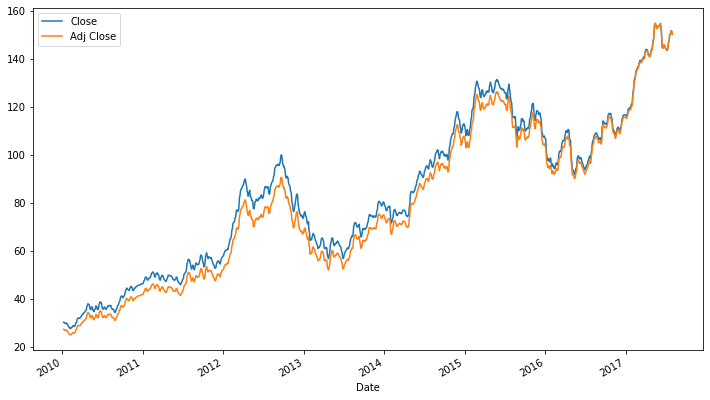

In [619]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

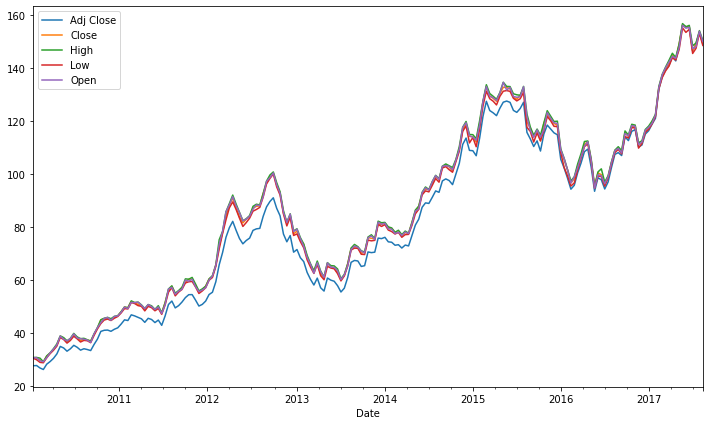

In [620]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

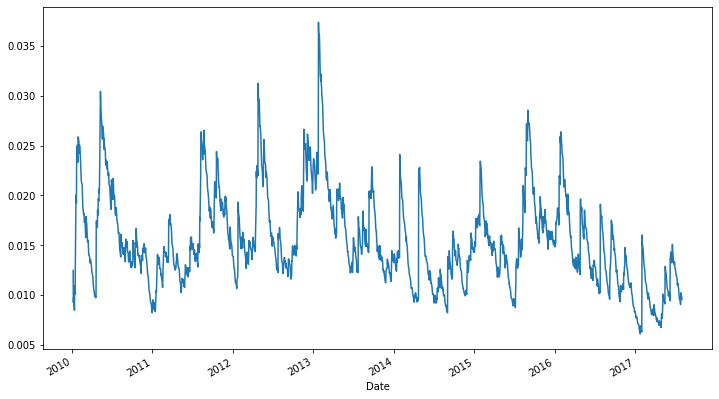

In [621]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [623]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:55: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [624]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

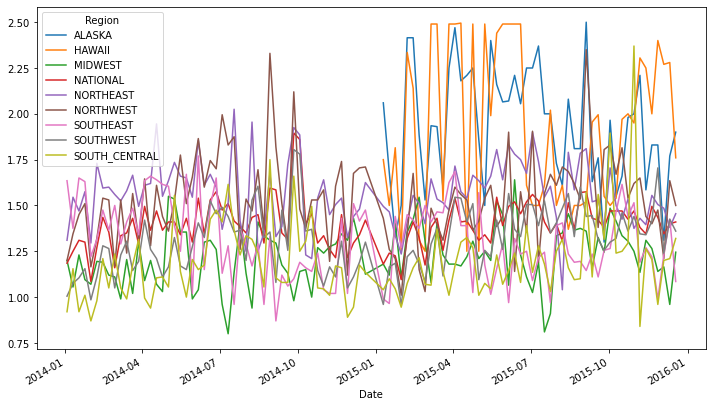

In [625]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [626]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

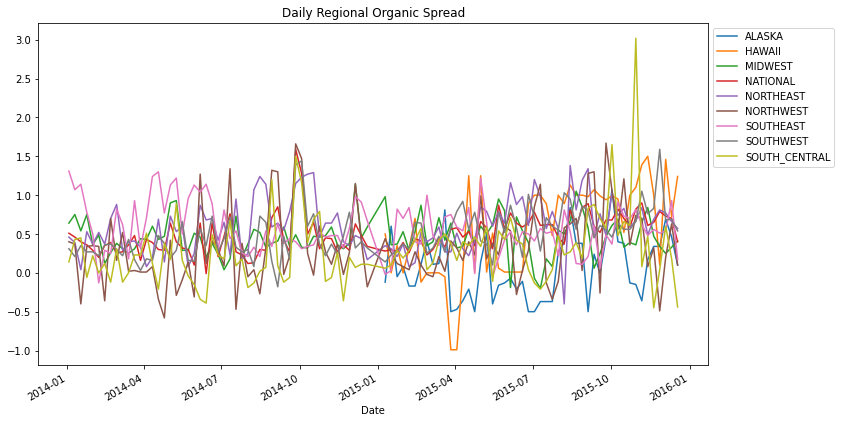

In [627]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [628]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


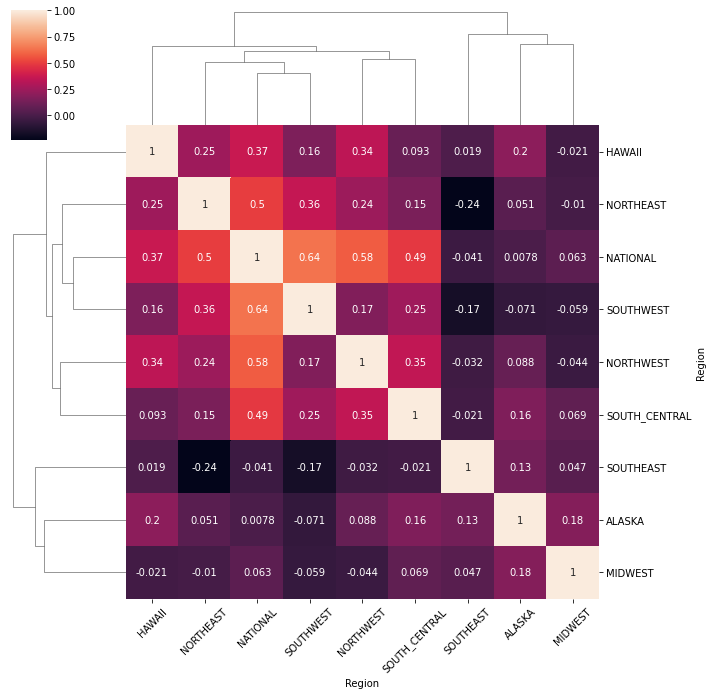

In [629]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

**Datos covid Bogota**

Analisis de datos de covid en Bogotá D.C hasta el día 5 de abril del 2022. Los datos son descargados de https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-confirmados-por-el-laboratorio-de-covid-19-bogota-d-c. Nota: Asegurarse de ponerlos en el directorio correcto.

En mi caso se descargo en archivo osb_enftransm-covid-19_01092022.csv, pero logicamente la alcaldia los renueva a diario, entonces se descarga el que este en ese momento y se verifica que el directorio y nombre esten bien.

In [630]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import altair as alt
import plotly.express as px
import scipy.stats as ss

In [641]:
df = pd.read_csv('osb_enftransm-covid-19_01092022.csv', encoding = 'utf-8',  sep=',')



In [642]:
df.head()

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19.0,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22.0,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28.0,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36.0,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42.0,1,F,Importado,Casa,Recuperado


In [643]:
df.columns

Index(['CASO', 'FECHA_DE_INICIO_DE_SINTOMAS', 'FECHA_DIAGNOSTICO', 'CIUDAD',
       'LOCALIDAD_ASIS', 'EDAD', 'UNI_MED', 'SEXO',
       'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO'],
      dtype='object')

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851673 entries, 0 to 1851672
Data columns (total 11 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   CASO                         int64  
 1   FECHA_DE_INICIO_DE_SINTOMAS  object 
 2   FECHA_DIAGNOSTICO            object 
 3   CIUDAD                       object 
 4   LOCALIDAD_ASIS               object 
 5   EDAD                         float64
 6   UNI_MED                      int64  
 7   SEXO                         object 
 8   FUENTE_O_TIPO_DE_CONTAGIO    object 
 9   UBICACION                    object 
 10  ESTADO                       object 
dtypes: float64(1), int64(2), object(8)
memory usage: 155.4+ MB


In [645]:
# Quitamos donde hayan variables vacias
vars = ['CASO', 'FECHA_DIAGNOSTICO', 'LOCALIDAD_ASIS', 'EDAD', 'UNI_MED',
       'SEXO', 'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO']

for i in vars:
  df = df[df[i].notna()]

In [646]:
df.shape

(1851673, 11)

In [647]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

FECHA_DE_INICIO_DE_SINTOMAS
['2020-02-26' '2020-03-04' '2020-03-07' '2020-03-06' '2020-03-08'
 '2020-02-28' '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13'
 '2020-03-14' '2020-03-09' '2020-03-05' '2020-03-15' '2020-03-26'
 '2020-03-16' '2020-04-29' '2020-04-16' '2020-03-18' '2020-03-17'
 '2020-03-21' '2020-03-20' '2020-03-19' '2020-03-22' '2020-03-24'
 '2020-03-25' '2020-04-13' '2020-04-11' '2020-03-23' '2020-03-27'
 '2020-04-04' '2020-04-10' '2020-03-28' nan '2020-04-14' '2020-03-29'
 '2020-03-30' '2020-04-06' '2020-04-17' '2020-03-31' '2020-04-09'
 '2020-04-20' '2020-04-01' '2020-04-02' '2020-04-26' '2020-04-03'
 '2020-04-07' '2020-04-05' '2020-04-19' '2020-04-30' '2020-04-08'
 '2020-04-18' '2020-04-12' '2020-04-25' '2020-04-15' '2020-05-06'
 '2020-04-21' '2020-04-27' '2020-05-03' '2020-04-24' '2020-04-23'
 '2020-05-01' '2020-04-22' '2020-05-09' '2020-05-11' '2020-12-15'
 '2020-04-28' '2020-05-17' '2020-05-15' '2020-05-30' '2020-05-24'
 '2020-05-12' '2020-05-02' '2020-05-05' '202

In [648]:
for column in df.columns:
    print(column,df[column].nunique())

CASO 1851673
FECHA_DE_INICIO_DE_SINTOMAS 910
FECHA_DIAGNOSTICO 904
CIUDAD 3
LOCALIDAD_ASIS 22
EDAD 120
UNI_MED 3
SEXO 2
FUENTE_O_TIPO_DE_CONTAGIO 8
UBICACION 5
ESTADO 6


In [649]:
df['CASO'] = df['CASO'].apply(lambda x: int(x))

In [650]:
datos_Categoricos=[dato for dato in df.columns if (df[dato].dtypes=='O')]
datos_Categoricos

['FECHA_DE_INICIO_DE_SINTOMAS',
 'FECHA_DIAGNOSTICO',
 'CIUDAD',
 'LOCALIDAD_ASIS',
 'SEXO',
 'FUENTE_O_TIPO_DE_CONTAGIO',
 'UBICACION',
 'ESTADO']

In [651]:
for dato in datos_Categoricos:
    print('En {} existen {} diferentes tipos de datos'.format(dato,len(df[dato].unique())))

En FECHA_DE_INICIO_DE_SINTOMAS existen 911 diferentes tipos de datos
En FECHA_DIAGNOSTICO existen 904 diferentes tipos de datos
En CIUDAD existen 3 diferentes tipos de datos
En LOCALIDAD_ASIS existen 22 diferentes tipos de datos
En SEXO existen 2 diferentes tipos de datos
En FUENTE_O_TIPO_DE_CONTAGIO existen 8 diferentes tipos de datos
En UBICACION existen 5 diferentes tipos de datos
En ESTADO existen 6 diferentes tipos de datos


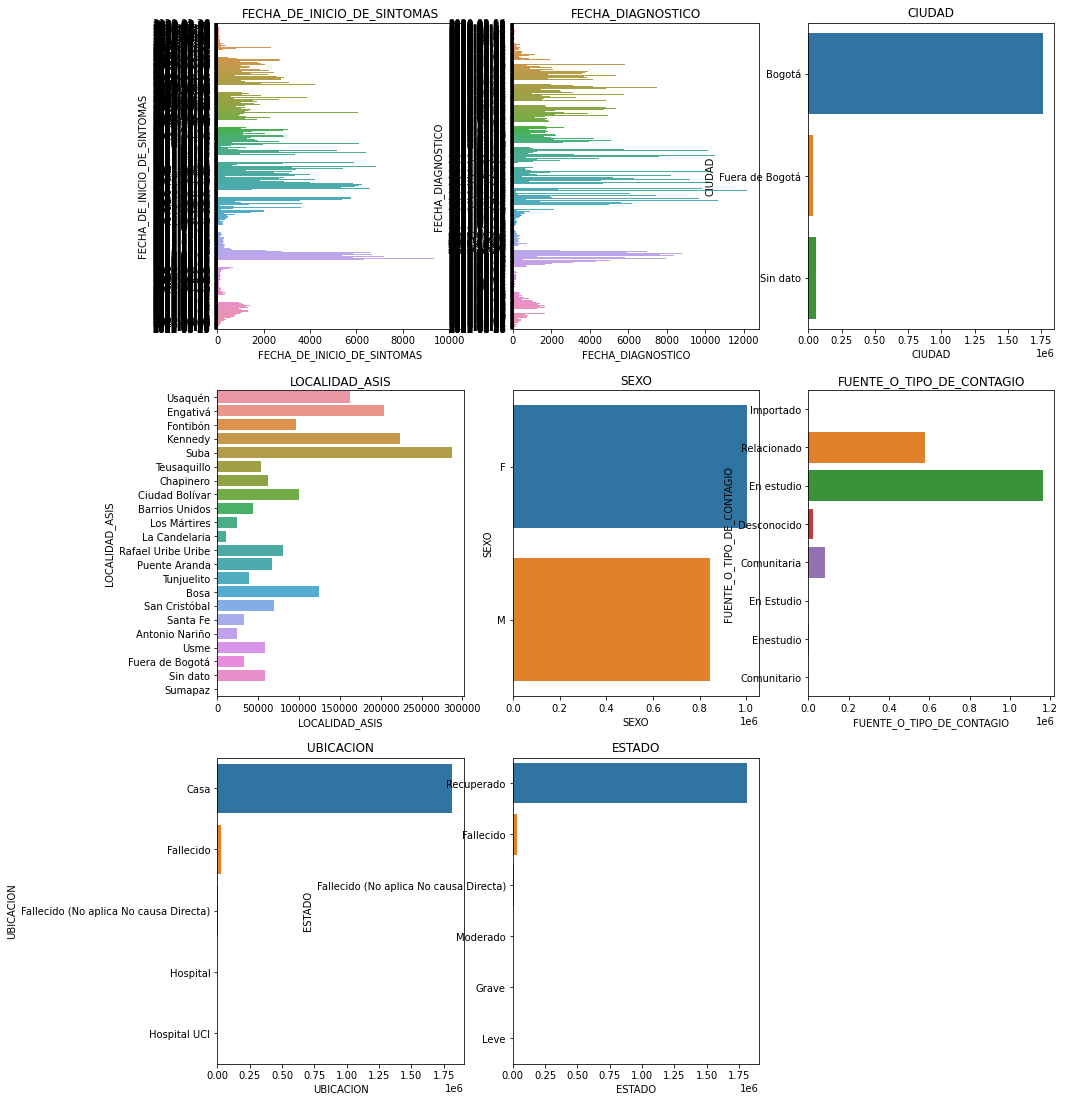

In [652]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for dato_Categorico in datos_Categoricos:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=dato_Categorico,data=df)
    plt.xlabel(dato_Categorico)
    plt.title(dato_Categorico)
    plotnumber+=1
plt.show()

In [653]:
for dato_Categorico in datos_Categoricos:
    print(df.groupby(['FECHA_DE_INICIO_DE_SINTOMAS',dato_Categorico]).size())

FECHA_DE_INICIO_DE_SINTOMAS  FECHA_DE_INICIO_DE_SINTOMAS
2020-02-26                   2020-02-26                      1
2020-02-28                   2020-02-28                      1
2020-03-04                   2020-03-04                      3
2020-03-05                   2020-03-05                      3
2020-03-06                   2020-03-06                      6
                                                            ..
2022-08-24                   2022-08-24                     14
2022-08-25                   2022-08-25                      1
2022-08-26                   2022-08-26                      2
2022-08-27                   2022-08-27                      3
2022-08-29                   2022-08-29                      4
Length: 910, dtype: int64
FECHA_DE_INICIO_DE_SINTOMAS  FECHA_DIAGNOSTICO
2020-02-26                   2020-03-06           1
2020-02-28                   2020-03-13           1
2020-03-04                   2020-03-10           1
                     

In [654]:
# Miramos que columnas tienen valores perdidos
df.isna().sum(axis=0)/len(df)

CASO                           0.00000
FECHA_DE_INICIO_DE_SINTOMAS    0.24784
FECHA_DIAGNOSTICO              0.00000
CIUDAD                         0.00000
LOCALIDAD_ASIS                 0.00000
EDAD                           0.00000
UNI_MED                        0.00000
SEXO                           0.00000
FUENTE_O_TIPO_DE_CONTAGIO      0.00000
UBICACION                      0.00000
ESTADO                         0.00000
dtype: float64

In [655]:
df.isnull().sum(axis=0)/len(df)

CASO                           0.00000
FECHA_DE_INICIO_DE_SINTOMAS    0.24784
FECHA_DIAGNOSTICO              0.00000
CIUDAD                         0.00000
LOCALIDAD_ASIS                 0.00000
EDAD                           0.00000
UNI_MED                        0.00000
SEXO                           0.00000
FUENTE_O_TIPO_DE_CONTAGIO      0.00000
UBICACION                      0.00000
ESTADO                         0.00000
dtype: float64

In [656]:
# FECHA DE INICIO DE SINTOMAS TIENE UN RATING DE MUCHOS VALORES PERDIDOS
df = df.drop(['FECHA_DE_INICIO_DE_SINTOMAS'], axis = 1) 
df = df.drop(['CIUDAD'], axis = 1) 

In [657]:
df['FECHA_DIAGNOSTICO']=df['FECHA_DIAGNOSTICO'].apply(lambda x: pd.to_datetime(x,errors='coerce')) # Takes 2-3 mins

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


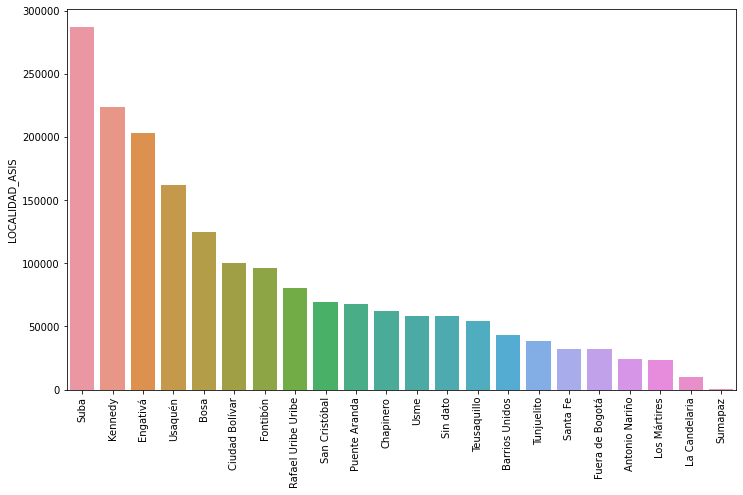

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


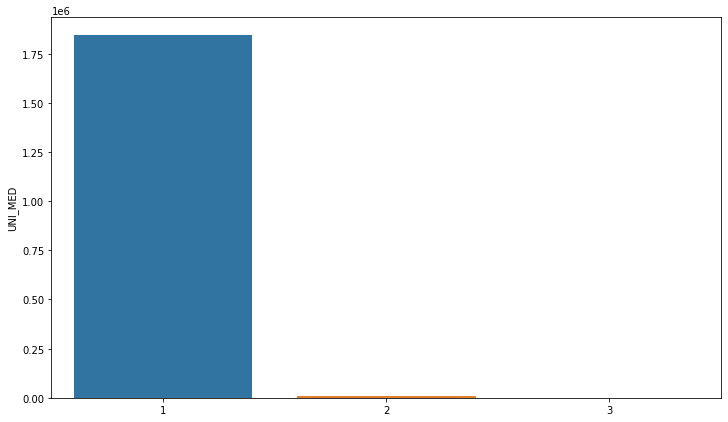

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


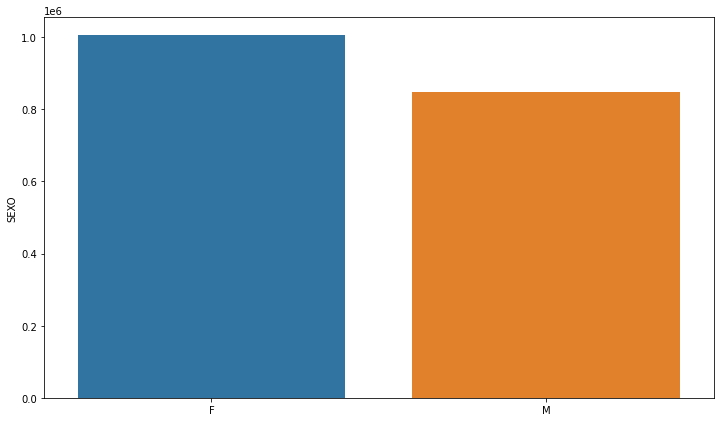

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


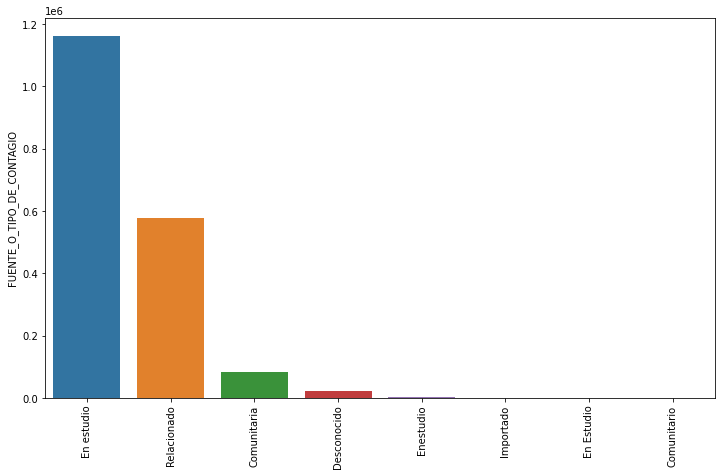

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


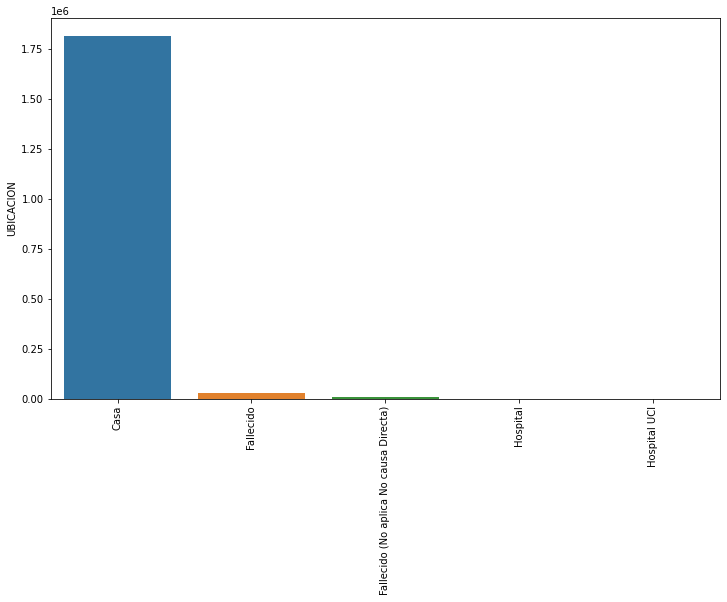

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


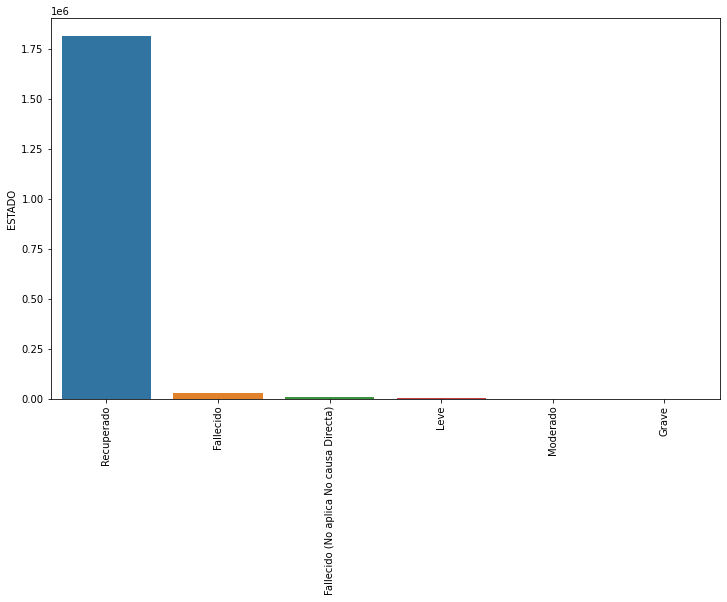

In [658]:
df_cat = df[['LOCALIDAD_ASIS', 'UNI_MED', 'SEXO', 'FUENTE_O_TIPO_DE_CONTAGIO', 'UBICACION', 'ESTADO']]
for i in df_cat.columns:
    ax = sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
    if len(df_cat[i].value_counts().index) >= 5:
      ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show(ax)

(array([9.69500e+04, 2.56422e+05, 5.13527e+05, 4.13506e+05, 3.04758e+05,
        1.73902e+05, 6.99090e+04, 2.15380e+04, 1.15300e+03, 8.00000e+00]),
 array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
        107.1, 119. ]),
 <a list of 10 Patch objects>)

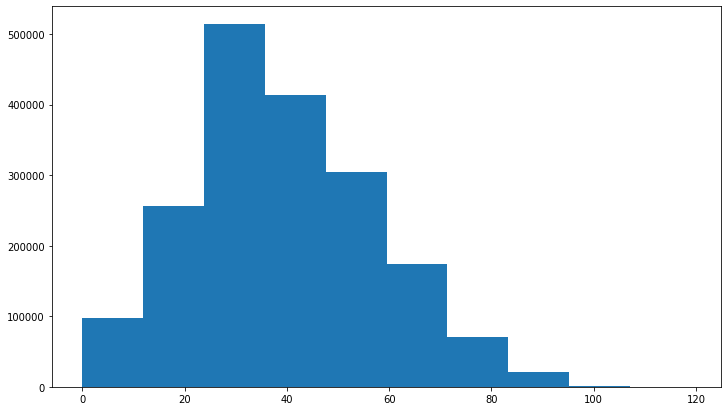

In [659]:
plt.hist(df['EDAD'])

In [660]:
# Quiero ver la evolucion de los datos a traves del tiempo  
dfNewCases = df[['CASO']].groupby(df['FECHA_DIAGNOSTICO'],axis=0).count()
dfNewCases

,CASO
FECHA_DIAGNOSTICO,
2020-03-06,1
2020-03-10,2
2020-03-12,2
2020-03-13,6
2020-03-14,4
...,...
2022-08-26,102
2022-08-27,91
2022-08-28,59


In [661]:
dfNewCases.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 904 entries, 2020-03-06 to 2022-08-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CASO    904 non-null    int64
dtypes: int64(1)
memory usage: 14.1 KB


In [662]:
# Fun Fact If You put it this way it turns into a series data structure (The only change is the parenthesis in 'CASO')
SeriesNewCases = df['CASO'].groupby(df['FECHA_DIAGNOSTICO'],axis=0).count()
SeriesNewCases

FECHA_DIAGNOSTICO
2020-03-06      1
2020-03-10      2
2020-03-12      2
2020-03-13      6
2020-03-14      4
             ... 
2022-08-26    102
2022-08-27     91
2022-08-28     59
2022-08-29     53
2022-08-30     13
Name: CASO, Length: 904, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


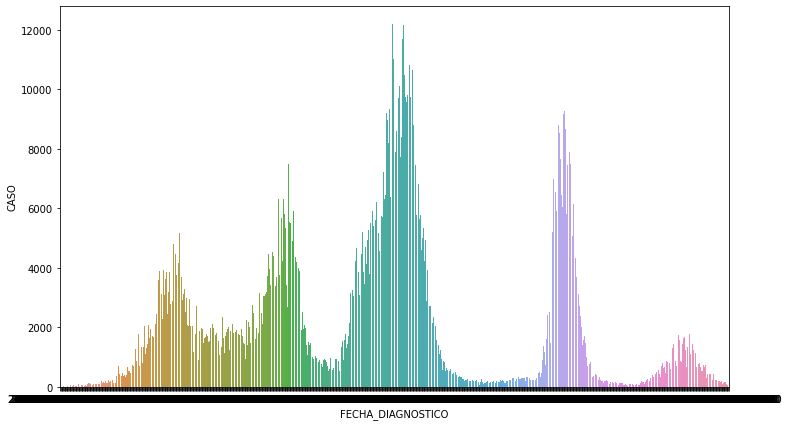

In [663]:
sns.barplot(dfNewCases.index,dfNewCases['CASO'])

In [664]:
total = df['SEXO'].value_counts()['M'] + df['SEXO'].value_counts()['F']
total  
RatioF = df['SEXO'].value_counts()['F']
RatioM = df['SEXO'].value_counts()['M']

In [665]:
print('Porcentaje de Mujeres infectadas {}%'.format(RatioF/total * 100))
print('Porcentaje de Hombres infectadas {}%'.format(RatioM/total * 100))

Porcentaje de Mujeres infectadas 54.26946334476984%
Porcentaje de Hombres infectadas 45.73053665523016%


([<matplotlib.patches.Wedge at 0x7f220a769090>,
 [Text(-0.14710004568059107, 1.0901199826444647, 'Femenino'),
  Text(0.14710004568059115, -1.0901199826444647, 'Masculino')],
 [Text(-0.08023638855304967, 0.5946108996242535, '54.3%'),
  Text(0.08023638855304971, -0.5946108996242535, '45.7%')])

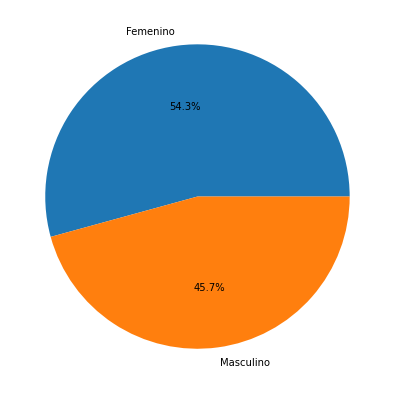

In [666]:
labels = 'Femenino', 'Masculino'
plt.pie(df_cat['SEXO'].value_counts(), labels=labels, autopct='%1.1f%%')

In [667]:
new_mask = df['ESTADO'] == 'Fallecido'
new_mask

0          False
1          False
2          False
3          False
4          False
           ...  
1851668    False
1851669    False
1851670    False
1851671    False
1851672    False
Name: ESTADO, Length: 1851673, dtype: bool

**Finalización de analisis de datos con los suministrados por el gobierno para los casos confirmados de covid en Bogota**

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!